<a href="https://colab.research.google.com/github/soumo99/AI_ML_Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Problem Statement 

To analyse the patients report from the dataset and  checking whether patient is suffering from Cardiovascular disease or not or whether he/she needs further treatment or not . 

Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')
import missingno as msno
import seaborn as sns

In [2]:
pip install gitly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = pd.read_csv('/content/heart.csv')

In [4]:
data.shape

(918, 12)

## Data Analysis

In [5]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
data.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [9]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [10]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [12]:
#Replacing all the object varibales to numeric data variables 
data.replace({'Sex':{'M':1,'F':2},'RestingECG':{'Normal':1,'ST':2,'LVH':3},
              'ExerciseAngina':{'N':0, 'Y':1},'ST_Slope':{'Up':1,'Flat':2,'Down':3}}, inplace = True)

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,1,172,0,0.0,1,0
1,49,2,NAP,160,180,0,1,156,0,1.0,2,1
2,37,1,ATA,130,283,0,2,98,0,0.0,1,0
3,48,2,ASY,138,214,0,1,108,1,1.5,2,1
4,54,1,NAP,150,195,0,1,122,0,0.0,1,0


In [14]:
data.describe()


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,132.396514,198.799564,0.233115,1.603486,136.809368,0.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,2.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [15]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [16]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

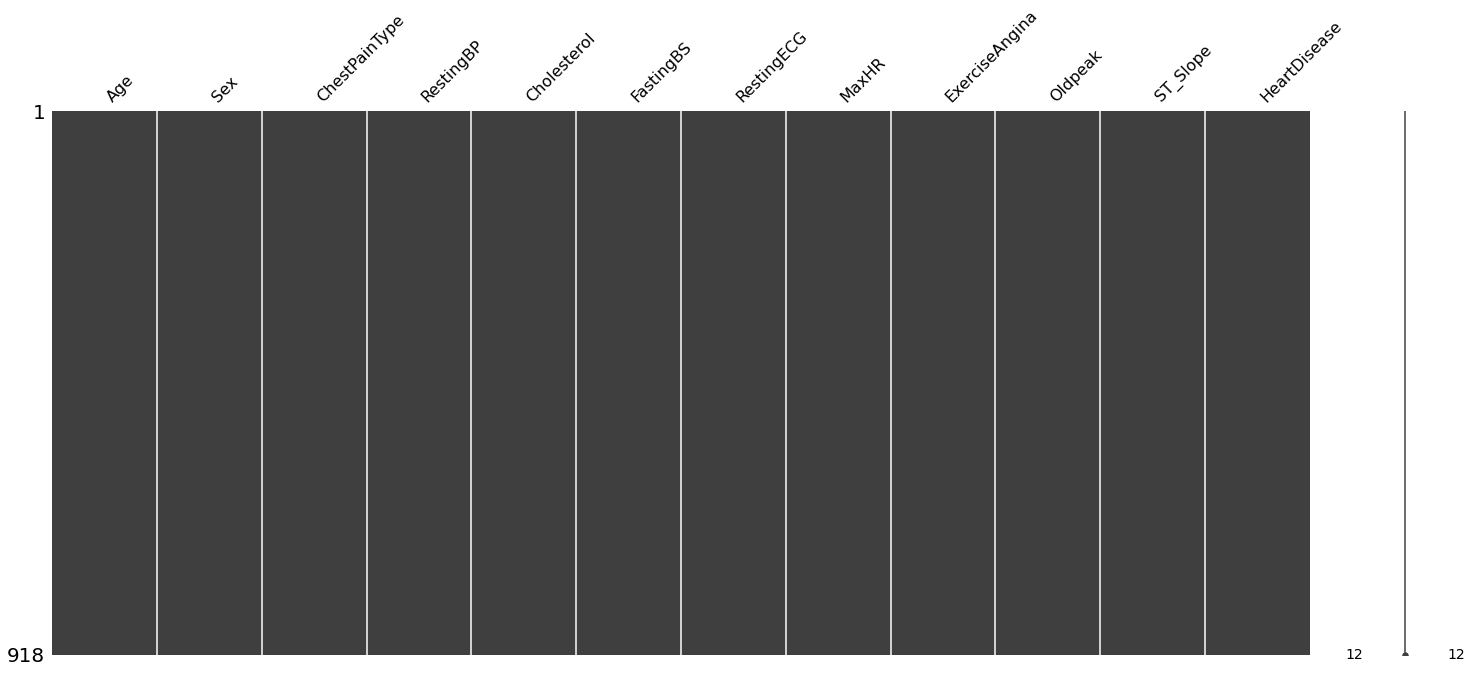

In [17]:
msno.matrix(data)

In [18]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Text(0, 0.5, 'Frequency')

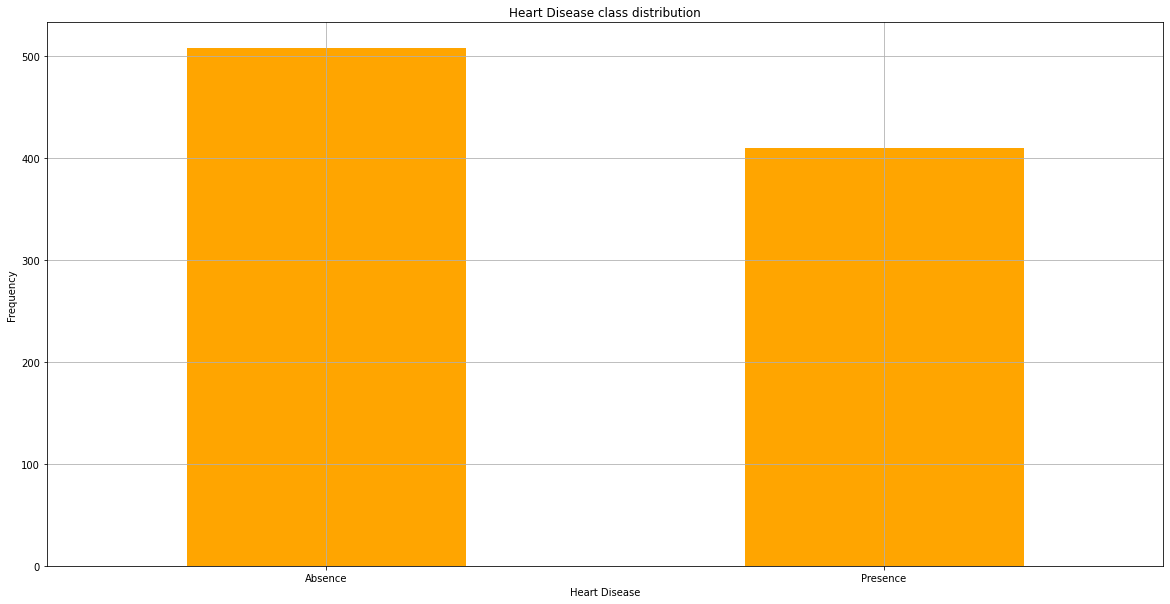

In [19]:
plt.figure(figsize = (20,10))
LABELS = ['Absence', 'Presence']
count_classes = pd.value_counts(data['HeartDisease'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = 'orange')
plt.title("Heart Disease class distribution")
plt.xticks(range(2), LABELS)
plt.grid()
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")

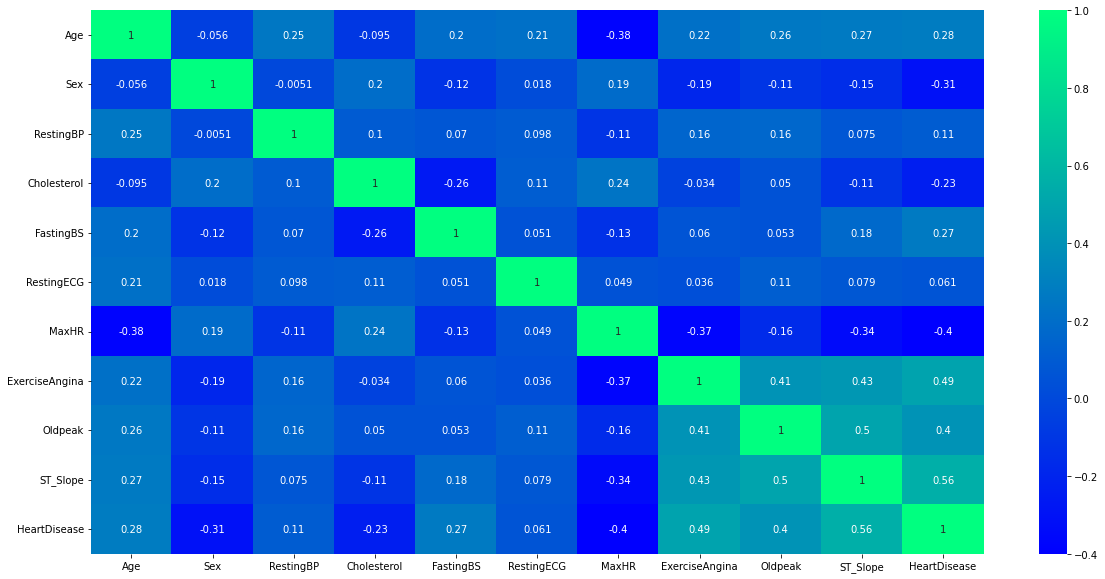

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True, cmap= "winter")

In [21]:
#Separating the dataste for perfect analysis
Absence = data[data.HeartDisease == 0]
Presence = data[data.HeartDisease == 1]

In [22]:
Absence.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,1.348780,130.180488,227.121951,0.107317,1.548780,148.151220,0.134146,0.408049,1.260976,0.0
std,9.444915,0.477167,16.499585,74.634659,0.309894,0.805732,23.288067,0.341226,0.699709,0.511663,0.0
min,28.000000,1.000000,80.000000,0.000000,0.000000,1.000000,69.000000,0.000000,-1.100000,1.000000,0.0
25%,43.000000,1.000000,120.000000,197.250000,0.000000,1.000000,134.000000,0.000000,0.000000,1.000000,0.0
50%,51.000000,1.000000,130.000000,227.000000,0.000000,1.000000,150.000000,0.000000,0.000000,1.000000,0.0
75%,57.000000,2.000000,140.000000,266.750000,0.000000,2.000000,165.000000,0.000000,0.600000,1.000000,0.0
max,76.000000,2.000000,190.000000,564.000000,1.000000,3.000000,202.000000,1.000000,4.200000,3.000000,0.0


In [23]:
Presence.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,1.098425,134.185039,175.940945,0.334646,1.647638,127.655512,0.622047,1.274213,1.942913,1.0
std,8.727056,0.298182,19.828685,126.391398,0.472332,0.804238,23.386923,0.485354,1.151872,0.497220,0.0
min,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,1.0
25%,51.000000,1.000000,120.000000,0.000000,0.000000,1.000000,112.000000,0.000000,0.000000,2.000000,1.0
50%,57.000000,1.000000,132.000000,217.000000,0.000000,1.000000,126.000000,1.000000,1.200000,2.000000,1.0
75%,62.000000,1.000000,145.000000,267.000000,1.000000,2.000000,144.250000,1.000000,2.000000,2.000000,1.0
max,77.000000,2.000000,200.000000,603.000000,1.000000,3.000000,195.000000,1.000000,6.200000,3.000000,1.0


In [24]:
#Comparing the values for both the transaction , calculating the mean 
data.groupby('HeartDisease').mean()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,
0,50.551220,1.348780,130.180488,227.121951,0.107317,1.548780,148.151220,0.134146,0.408049,1.260976
1,55.899606,1.098425,134.185039,175.940945,0.334646,1.647638,127.655512,0.622047,1.274213,1.942913


In [25]:
#Comparing the values for both the transaction , calculating the median 
data.groupby('HeartDisease').median()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,
0,51.0,1.0,130.0,227.0,0.0,1.0,150.0,0.0,0.0,1.0
1,57.0,1.0,132.0,217.0,0.0,1.0,126.0,1.0,1.2,2.0


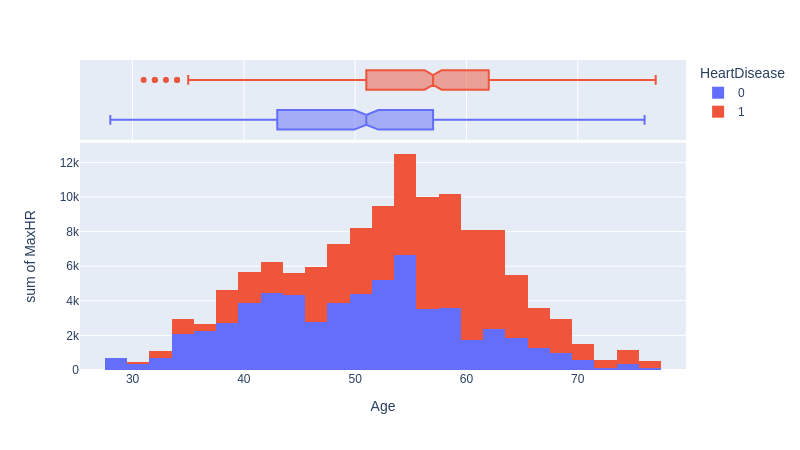

In [26]:
figure = px.histogram(data, x = 'Age', y = 'MaxHR',color = 'HeartDisease',
                      marginal = 'box', hover_data = data.columns)

gitly.show(figure)

In [27]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Observation : It is observed that patient with sum of Max Heart Rate greater than or equal to 5823 are more likely to get heart attacks 

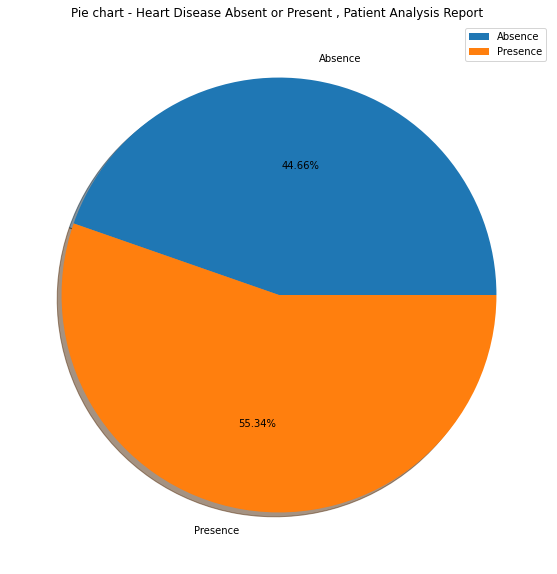

In [28]:
plt.figure(figsize = (15,10))
size_data = [data.HeartDisease[data['HeartDisease'] == 0].count(), data.HeartDisease[data['HeartDisease'] == 1].count()]
labels = ['Absence', 'Presence']
plt.pie(size_data, labels = labels, shadow = True, autopct = "%1.2f%%")
plt.legend()
plt.title('Pie chart - Heart Disease Absent or Present , Patient Analysis Report ')
plt.show()

Percentage of patients suffering from 3 different chest pain types : [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

In [29]:
# =================================== TYPICAL ANGINA =======================================

ty_type = data.HeartDisease[(data.ChestPainType == 'TA') & (data.HeartDisease == 1)].count()
ty_type_count = data.HeartDisease[(data.ChestPainType == 'TA')].count()
print('The percentage count of Typical Angina Chest pain type : ',ty_type * 100 / ty_type_count, '%')

# ==================================== ATYPICAL ANGINA =======================================
ata_type = data.HeartDisease[(data.ChestPainType == 'ATA') & (data.HeartDisease == 1)].count()
ata_type_count = data.HeartDisease[(data.ChestPainType == 'ATA')].count()
print('The percentage count of Atypical Angina Chest pain type : ',ata_type * 100 / ata_type_count, '%')

# ==================================== NON ANGINAL PAIN =======================================
nap_type = data.HeartDisease[(data.ChestPainType == 'NAP') & (data.HeartDisease == 1)].count()
nap_type_count = data.HeartDisease[(data.ChestPainType == 'NAP')].count()
print('The percentage count of Non Angina Pain Chest pain type : ',nap_type * 100 / nap_type_count, '%')

# ==================================== ASYMPTOMATIC ============================================
asy_type = data.HeartDisease[(data.ChestPainType == 'ASY') & (data.HeartDisease == 1)].count()
asy_type_count = data.HeartDisease[(data.ChestPainType == 'ASY')].count()
print('The percentage count of Asymptomatic Chest pain type : ',asy_type * 100 / asy_type_count, '%')

The percentage count of Typical Angina Chest pain type :  43.47826086956522 %
The percentage count of Atypical Angina Chest pain type :  13.872832369942197 %
The percentage count of Non Angina Pain Chest pain type :  35.467980295566505 %
The percentage count of Asymptomatic Chest pain type :  79.03225806451613 %


In [30]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'Age', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [31]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'Sex', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [32]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'ChestPainType', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [33]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'RestingBP', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [34]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'Cholesterol', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [35]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'FastingBS', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [36]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'RestingECG', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [37]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'MaxHR', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [38]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'ExerciseAngina', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

In [39]:
plt.figure(figsize = (15,10))
px.histogram(data, x = 'Oldpeak', color = 'HeartDisease', barmode = 'group' )

<Figure size 1080x720 with 0 Axes>

Observation 

From the total dataset 44.66% patients are suffering from cardiovascular disease

The following observations are being made from the patients report  which are prone to heart atatcks or cardiovascular disease - 

1. Patients with Asymptomatic Chest pain type 
2. Male patients are suffering  of varying age groups
3. Resting blood pressure with the range of 100 - 150 
4. Patients having Cholestrol range of 0 - 19
5. Patients with fasting blood sugar negative 
6. Maximum Heart Rate with 120 - 124
7. Patients with positive exercise angina result  


In [40]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [41]:
data['ChestPainType'] = data['ChestPainType'].map({'ATA':1,'NAP':2,'ASY':3,'TA':4})

# Model Building 

In [42]:
#Dividing the dataset between independent and dependent varibales 
X = data.iloc[:,:-1]
Y = data.iloc[:,-1] 

In [43]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,1
1,49,2,2,160,180,0,1,156,0,1.0,2
2,37,1,1,130,283,0,2,98,0,0.0,1
3,48,2,3,138,214,0,1,108,1,1.5,2
4,54,1,2,150,195,0,1,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,0,1.2,2
914,68,1,3,144,193,1,1,141,0,3.4,2
915,57,1,3,130,131,0,1,115,1,1.2,2
916,57,2,1,130,236,0,3,174,0,0.0,2


In [44]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [45]:
#Splitting the dataset between training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

In [46]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
76,32,1,3,118,529,0,1,130,0,0.0,2
48,36,1,2,112,340,0,1,184,0,1.0,2
304,51,1,3,95,0,1,1,126,0,2.2,2
263,59,1,3,130,126,0,1,125,0,0.0,2
744,60,1,3,117,230,1,1,160,1,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
835,54,1,3,110,239,0,1,126,1,2.8,2
192,48,1,1,130,245,0,1,160,0,0.0,1
629,57,2,3,128,303,0,3,159,0,0.0,1
559,64,1,3,134,273,0,1,102,1,4.0,3


In [47]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
306,55,1,3,115,0,1,1,155,0,0.1,2
711,66,1,3,120,302,0,3,151,0,0.4,2
298,51,1,3,110,0,1,1,92,0,0.0,2
466,55,1,2,120,0,0,2,125,1,2.5,2
253,62,1,1,140,271,0,1,152,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
49,41,1,3,110,289,0,1,170,0,0.0,2
456,61,1,2,120,0,0,1,80,1,0.0,2
342,61,1,3,110,0,1,1,113,0,1.4,2
907,44,1,3,120,169,0,1,144,1,2.8,3


In [48]:
#Scaling down the values 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train

array([[-2.28534906, -0.51601569,  0.66513843, ..., -0.83034552,
        -0.84052373,  0.59059305],
       [-1.86194697, -0.51601569, -0.48585583, ..., -0.83034552,
         0.10434798,  0.59059305],
       [-0.27418913, -0.51601569,  0.66513843, ..., -0.83034552,
         1.23819403,  0.59059305],
       ...,
       [ 0.36091401,  1.93792558,  0.66513843, ..., -0.83034552,
        -0.84052373, -1.03670626],
       [ 1.10186767, -0.51601569,  0.66513843, ...,  1.20431793,
         2.93896311,  2.21789237],
       [-0.69759122, -0.51601569, -0.48585583, ..., -0.83034552,
        -0.84052373, -1.03670626]])

In [50]:
X_test

array([[ 0.14921296, -0.51601569,  0.66513843, ..., -0.83034552,
        -0.74603656,  0.59059305],
       [ 1.31356871, -0.51601569,  0.66513843, ..., -0.83034552,
        -0.46257504,  0.59059305],
       [-0.27418913, -0.51601569,  0.66513843, ..., -0.83034552,
        -0.84052373,  0.59059305],
       ...,
       [ 0.7843161 , -0.51601569,  0.66513843, ..., -0.83034552,
         0.48229667,  0.59059305],
       [-1.01514279, -0.51601569,  0.66513843, ...,  1.20431793,
         1.80511706,  2.21789237],
       [-1.65024592, -0.51601569,  0.66513843, ..., -0.83034552,
        -0.84052373,  0.59059305]])

# Model Implementation 

In [51]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')

model_clf = LazyClassifier(verbose = 0 , ignore_warnings = True, custom_metric = None, classifiers = 'all')
models, predictions = model_clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:01<00:00, 21.28it/s]


In [53]:
#Printing all the models along with the performce data
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.87               0.86     0.86      0.87   
XGBClassifier                      0.86               0.85     0.85      0.86   
ExtraTreesClassifier               0.86               0.85     0.85      0.86   
AdaBoostClassifier                 0.86               0.85     0.85      0.86   
RandomForestClassifier             0.86               0.85     0.85      0.85   
LinearSVC                          0.86               0.84     0.84      0.85   
SVC                                0.85               0.84     0.84      0.85   
CalibratedClassifierCV             0.85               0.84     0.84      0.85   
KNeighborsClassifier               0.85               0.84     0.84      0.85   
QuadraticDiscriminantAnalysis      0.85               0.84     0.84      0.85   
BaggingClassifier           

Visualizing the Accuracy of Diff Classification models peformed -

In [54]:
models.sort_values(by = 'Accuracy', inplace = True, ascending = False)
line = px.line(data_frame = models, y = ['Accuracy'], markers = True)
line.update_xaxes(title = 'Models', rangeslider_visible = False)
line.update_yaxes(title = 'Accuracy')
line.update_traces(line_color = 'green')
line.update_layout(showlegend = True, title = {'text': 'Accuracy vs Model'})

line.show()


Visualizing the Time Taken of Diff Classification models peformed

In [55]:
models.sort_values(by = 'Time Taken', inplace = True, ascending = False)
line = px.line(data_frame = models, y = ['Time Taken'], markers = True)
line.update_xaxes(title = 'Models', rangeslider_visible = False)
line.update_yaxes(title = 'Time Taken')
line.update_traces(line_color = 'blue')
line.update_layout(showlegend = True, title = {'text': 'Time Taken vs Model'})

line.show()

OBSERVATION : On the Accuracy side of the Models , LGBMClassifier works best with an accuracy of 0.8652 and the least time taken is by the DummyClassifier 0.011

# The Future scope of the model is to be more perfect , making it more accurate so it can be used in the Medical Industry Areas for analysis of patients report and based on the analysis the patients treatment will depend . 